# Stage 1

## Obtain Street Graphs

### Walking Graph

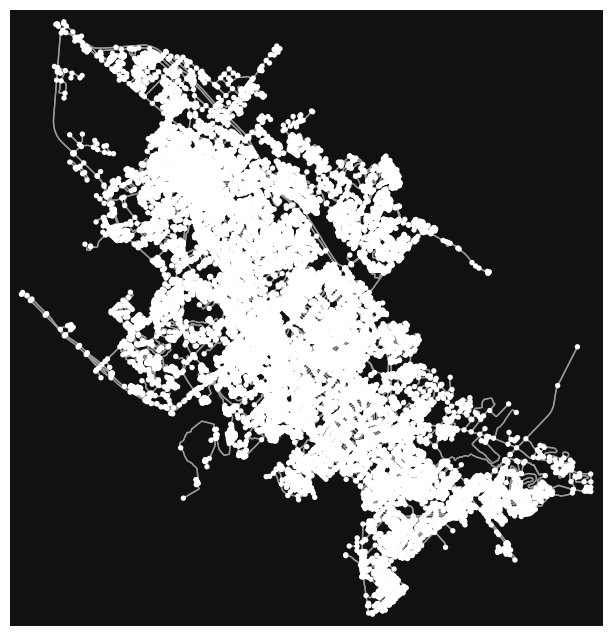

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
import osmnx
import networkx

walking_graph: networkx.MultiDiGraph = osmnx.graph_from_place(
    [
        'Bryan, USA',
        'College Station, USA'
    ],
    network_type='walk'
)

osmnx.plot_graph(walking_graph)

### Driving Graph

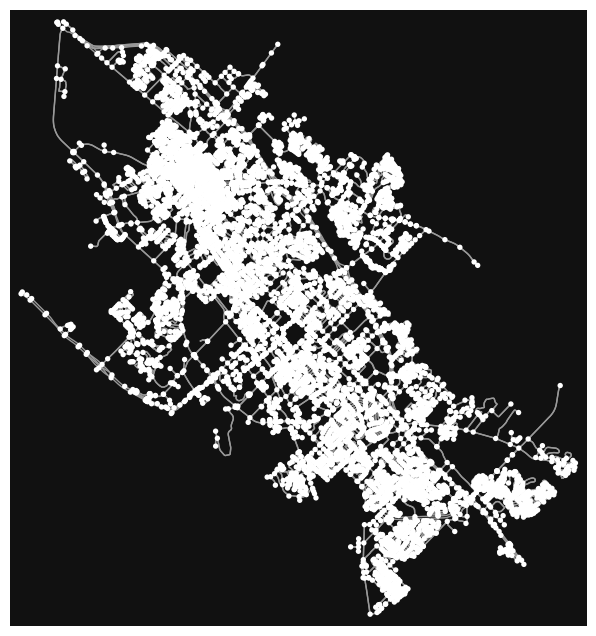

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
import osmnx
import networkx

driving_graph: networkx.MultiDiGraph = osmnx.graph_from_place(
    [
        'Bryan, USA',
        'College Station, USA'
    ],
    network_type='drive'
)

osmnx.plot_graph(driving_graph)

### Retrieve a Bus Route

In [ ]:
import osmnx
import networkx
import matplotlib.pyplot
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon

transit_graph: networkx.MultiDiGraph = osmnx.graph_from_place(
    [
        'Bryan, USA',
        'College Station, USA'
    ],
    network_type=drive,
)

bus_route_geometries = osmnx.geometries_from_place([
        'Bryan, USA',
        'College Station, USA'
    ],
    {
        'route': 'bus'
    }
)

fig, ax = ox.plot_graph(transit_graph, fig_height=10, show=False, close=False, edge_color='#777777')

for geometry in bus_route_geometries['geometry'].tolist():
    if isinstance(geometry, (Polygon, MultiPolygon)):
        if isinstance(geometry, Polygon):
            geometry = MultiPolygon([geometry])
        for polygon in geometry:
            patch = PolygonPatch(polygon, fc='#cccccc', ec='k', linewidth=3, alpha=0.1, zorder=-1)
            ax.add_patch(patch)

margin = 0.02
west, south, east, north = gdf.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))

pyplot.show()

# osmnx.plot_graph(transit_graph)

ModuleNotFoundError: No module named 'osmnx'